In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
data = pd.read_csv('sales-data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   Sales   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


,Date,Sales
0,2023-01-01,52.490142
1,2023-01-02,50.896298
2,2023-01-03,53.565075
3,2023-01-04,56.501669
4,2023-01-05,51.540170


In [24]:
# Step 1: Convert 'Date' column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])
# Step 2: Set 'Date' as index
data.set_index('Date', inplace= True)
# Step 3: (Optional) Sort index if needed
data.sort_index(inplace = True)

print(data.head())
print(data.index)


                Sales
Date                 
2023-01-01  52.490142
2023-01-02  50.896298
2023-01-03  53.565075
2023-01-04  56.501669
2023-01-05  51.540170
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


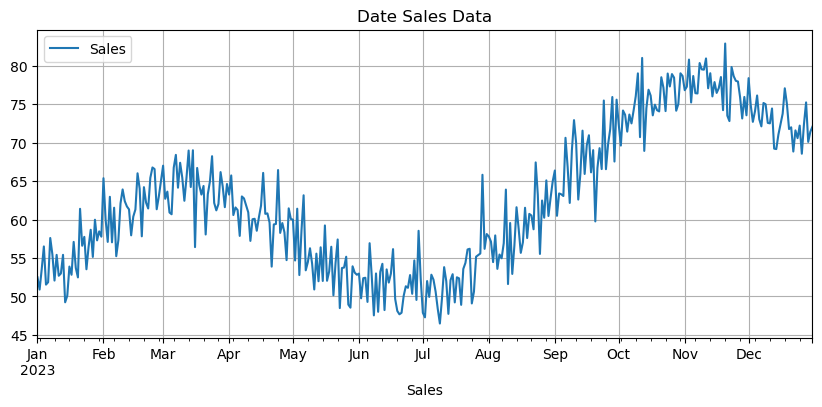

In [26]:
# Visualization of data:
data.plot(figsize=(10,4), title= 'Date Sales Data')
plt.xlabel('Date')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

In [30]:
# Normalize the data:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_sales = scaler.fit_transform(data)


def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequence(scaled_sales, seq_length)

# Train-test split (80%-20%)
split_idx = int(len(X) * 0.8)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [31]:
# Model Creation

model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(units= 50, activation='relu', input_shape = (seq_length, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(units= 25, activation='relu'))

model.add(tf.keras.layers.Dense(units= 1))

# Model Compile
model.compile(optimizer = 'Adam',
              loss = 'mse')

model.summary()

c:\Users\thedo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0180 - val_loss: 0.0138
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - val_loss: 0.0145
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0090 - val_loss: 0.0206
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0090 - val_loss: 0.0205
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0089 - val_loss: 0.0225
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0089 - val_loss: 0.0157
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0085 - val_loss: 0.0143
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0086 - val_loss: 0.0154
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - val_loss: 0.0050
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Rescale to original values
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test_orig):], y_test_orig, label="Actual Sales")
plt.plot(data.index[-len(y_test_orig):], y_pred_orig, label="Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()